# ACS DATASET

In this project, our focus lies in exploring the unemployment rate among four distinct groups of females within the civilian demographic actively searching for employment opportunities.

The three groups are:

- 25 to 29 years old 
- 30 to 34 years old
- 35 to 44 years old
- 45 to 54 years old

Originaly, we are interested in the data before and after Covid. However, the API calls are restricted to data prior to 2019, we'll narrow our focus to the dataset specifically from the year 2019 for this project.

#### Steps of the project:

- Download data from "https://api.census.gov/data/" using API method and codes from PUMS file. 

- Prepare data: combine, checking for missing data, caculate percentage.

- Descriptive statistics to understand the dataset


#### Group B23001 "Sex by age by employment status for the populuation 16 years and over"
We will explore the age group from 25 to 54 years old.
 
##### PUMS codes:

-"B23001_001E" Total population

-B23001_113E	Estimate!!Total:!!Female:!!25 to 29 years:!!In labor force:!!Civilian:

-B23001_115E	Estimate!!Total:!!Female:!!25 to 29 years:!!In labor force:!!Civilian:!!Unemployed

-B23001_120E	Estimate!!Total:!!Female:!!30 to 34 years:!!In labor force:!!Civilian:

-B23001_122E	Estimate!!Total:!!Female:!!30 to 34 years:!!In labor force:!!Civilian:!!Unemployed

-B23001_127E	Estimate!!Total:!!Female:!!35 to 44 years:!!In labor force:!!Civilian:

-23001_129E	Estimate!!Total:!!Female:!!35 to 44 years:!!In labor force:!!Civilian:!!Unemployed

-B23001_134E	Estimate!!Total:!!Female:!!45 to 54 years:!!In labor force:!!Civilian:

-B23001_136E	Estimate!!Total:!!Female:!!45 to 54 years:!!In labor force:!!Civilian:!!Unemployed



## Step 1: Download data.


In [96]:
#Import packages
import pandas as pd
import requests
import matplotlib.pyplot as plt
import seaborn as sns
#this package is to show the progress bar while downloading data 
from tqdm.notebook import tqdm

# This variable contains the unemployment count codes from PUMS file
variables = "NAME,B23001_001E,B23001_113E,B23001_115E,B23001_120E,B23001_122E,B23001_127E,B23001_129E,B23001_134E,B23001_136E"

# Create the list of column names for the dataset 
column_names = ["state", "total_pop", 
                "total_2529", "unempl_2529",
                "total_3034", "unempl_3034",
                "total_3544", "unempl_3544",
                "total_4554", "unempl_4554",
                "state_id"
] 
print(len(column_names))

# Create the URL to download the data using API calls
url_s = "https://api.census.gov/data/2019/acs/acs1?get="+variables+"&for=state:*"
url_s = url_s.replace(" ","")
print(url_s)

#Download the data from census.gov/data

response = requests.get(url = url_s)

# We need to check if the API call is successul or not
if response.status_code == 200:
    # Convert JSON reponse to a DataFrame format
    df_unempl = pd.DataFrame(response.json())
    # Delete the first row since that is the information of the columns, not the data
    df_unempl  = df_unempl.drop(df_unempl.index[0])
else:
    print("AIP calls is failed!")
    
# Change the column names accordingly to the variable list

df_unempl.columns = column_names

# Check the dataset
df_unempl.head()
df_unempl.info()
df_unempl.shape



11
https://api.census.gov/data/2019/acs/acs1?get=NAME,B23001_001E,B23001_113E,B23001_115E,B23001_120E,B23001_122E,B23001_127E,B23001_129E,B23001_134E,B23001_136E&for=state:*
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 1 to 52
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   state        52 non-null     object
 1   total_pop    52 non-null     object
 2   total_2529   52 non-null     object
 3   unempl_2529  52 non-null     object
 4   total_3034   52 non-null     object
 5   unempl_3034  52 non-null     object
 6   total_3544   52 non-null     object
 7   unempl_3544  52 non-null     object
 8   total_4554   52 non-null     object
 9   unempl_4554  52 non-null     object
 10  state_id     52 non-null     object
dtypes: object(11)
memory usage: 4.6+ KB


(52, 11)

## Step 2: Prepare the data set

- Check for missing value
- Calculate the percentage

In the dataset we have 52 rows. Besides the 50 U.S. states, we also have Peurto Rico and The District of Columbia. For now, we will keep all the rows and explore the data first. 

In [99]:
# Check for missing values, this will print the number of missisng value for each column
df_unempl.isna().sum()

# List of all numeric columns in the dataset
numeric_cols =  [
                "total_2529", "unempl_2529",
                "total_3034", "unempl_3034",
                "total_3544", "unempl_3544",
                "total_4554", "unempl_4554",
] 

df_unempl[numeric_cols] = df_unempl[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Calculate the percentage for each state

# Define the age groups, this will help for later if we want to explore more age groups
age_groups = ["2529", "3034", "3544", "4554"]

# This loop will help for more age group exploration later

for age_group in age_groups:
    # Define column names
    total_col = "total_" + age_group
    unempl_col = "unempl_" + age_group 
    percentage_col = "rate_unempl_" + age_group 
    
    # Calculate unemployment percentage for the age group
    df_unempl[percentage_col] = (df_unempl[unempl_col] / df_unempl[total_col]) * 100

df_unempl.head()




,state,total_pop,total_2529,unempl_2529,total_3034,unempl_3034,total_3544,unempl_3544,total_4554,unempl_4554,state_id,rate_unempl_2529,rate_unempl_3034,rate_unempl_3544,rate_unempl_4554
1,Illinois,10184783,369299,19628,346541,15300,652148,22527,634996,23524,17,5.314935,4.415062,3.454277,3.704590
2,Georgia,8394269,301190,20203,279458,14280,560556,18231,548404,19087,13,6.707726,5.109891,3.252307,3.480463
3,Idaho,1386665,44065,1882,43208,1268,82218,1410,78968,1876,16,4.270963,2.934642,1.714953,2.375646
4,Hawaii,1147569,35872,746,34524,1244,74289,1072,68072,1512,15,2.079616,3.603290,1.443013,2.221178
5,Indiana,5346452,179616,8316,167143,6755,324777,13101,318344,8201,18,4.629877,4.041450,4.033845,2.576144


# Descriptive Statistics

We only use the column of state names, unemployment rates and also the state id now, so we create a new dataframe with those columns. 

In this section, we will explore the dataset by creating several descriptive statstics for all the states. 

After that, we will look at a few states to see the if there is a significant different between in the unemployment rate accross the age group. 

/var/folders/3t/rwcn0jt95hj3mylt31sbtsm00000gv/T/ipykernel_1260/2787176158.py:18: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(data=df_unempl_rate.iloc[:,2:], palette=colors)


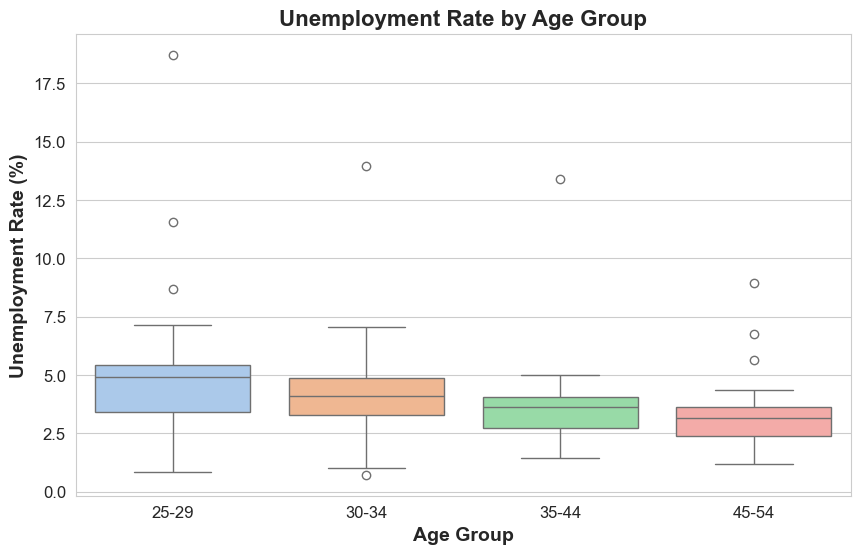

In [100]:
# Boxplot across the age groups 
#-- Create the new data frame
df_unempl_rate = pd.DataFrame({
    "state": df_unempl["state"],
    "state_id": df_unempl["state_id"],
    "25-29": df_unempl["rate_unempl_2529"],
    "30-34": df_unempl["rate_unempl_3034"],
    "35-44": df_unempl["rate_unempl_3544"],
    "45-54": df_unempl["rate_unempl_4554"]
})

# Set style and color for the plot
sns.set_style("whitegrid")
colors = sns.color_palette("pastel")

# Plot the box plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_unempl_rate.iloc[:,2:], palette=colors)
plt.title("Unemployment Rate by Age Group", fontsize=16, fontweight='bold')
plt.xlabel("Age Group", fontsize=14, fontweight='bold')
plt.ylabel("Unemployment Rate (%)", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



Looking at the boxplot among the four groups, we see that there are some very serious outliers. Let's look at the state names that have those extreme values.

It turns out that Puerto Rico is the state that has all the highest values of unemployment rate for all the age group. This can lead to another interesting project. However, we just remove the Peurto Rico state for now. FIPs code = 72.


/var/folders/3t/rwcn0jt95hj3mylt31sbtsm00000gv/T/ipykernel_1260/209378513.py:9: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sns.boxplot(data=df_unempl_rate.iloc[:,2:], palette=colors)


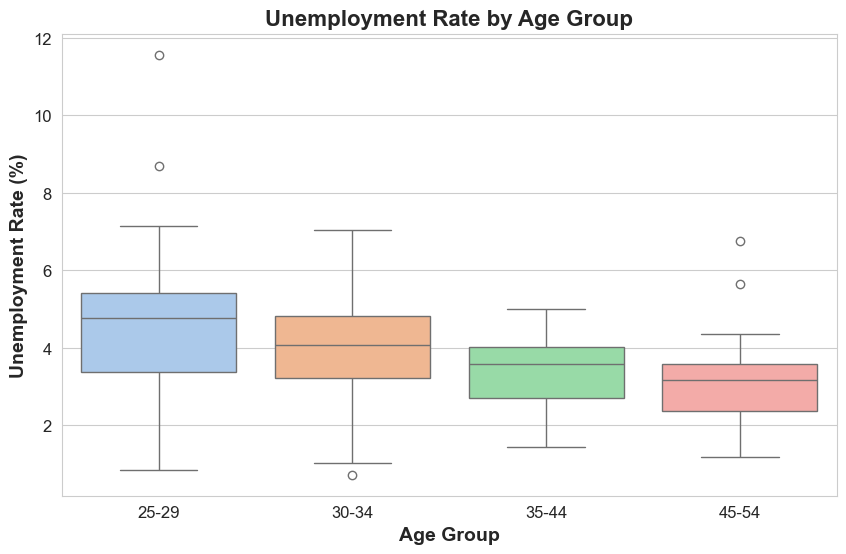

In [101]:
# Remove the Peurto Rico state from the dataset

df_unempl_rate = df_unempl_rate[df_unempl_rate["state_id"]!="72"]

# Checking for the list
df_unempl_rate.shape
# Let's look at the boxplot again
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_unempl_rate.iloc[:,2:], palette=colors)
plt.title("Unemployment Rate by Age Group", fontsize=16, fontweight='bold')
plt.xlabel("Age Group", fontsize=14, fontweight='bold')
plt.ylabel("Unemployment Rate (%)", fontsize=14, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()



Now, we will create of the summarized descriptive statistics for the unemploment rate for all the groups.

In [102]:
df_unempl_rate.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51 entries, 1 to 51
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state     51 non-null     object 
 1   state_id  51 non-null     object 
 2   25-29     51 non-null     float64
 3   30-34     51 non-null     float64
 4   35-44     51 non-null     float64
 5   45-54     51 non-null     float64
dtypes: float64(4), object(2)
memory usage: 2.8+ KB


In [103]:

# Create a summarize table for all the rate columns.

df_statistics = df_unempl_rate[["25-29", "30-34", "35-44", "45-54"]].describe()

# Make the table look clearer
df_statistics.index = ['Count', 'Mean', 'Std', 'Min', 'Q1', 'Median', 'Q2', 'Max']

# Apply custom styling
styled_df = df_statistics.style.format("{:.2f}")
styled_df = styled_df.set_table_styles(
    [{'selector': 'th', 'props': [('text-align', 'center')]},
     {'selector': 'td', 'props': [('text-align', 'center')]}]
)

# Display the styled DataFrame
styled_df


,25-29,30-34,35-44,45-54
Count,51.00,51.00,51.00,51.00
Mean,4.68,3.96,3.42,3.05
Std,1.86,1.41,0.93,1.01
Min,0.85,0.73,1.44,1.19
Q1,3.39,3.23,2.70,2.36
Median,4.78,4.08,3.57,3.17
Q2,5.42,4.82,4.02,3.59
Max,11.56,7.05,5.00,6.75


Now, we will check for normality among all the rate variables using the distribution and also using Shapiro-Wilk Test. We use this test because our data set is small (with 51 rows), for a larger dataset there are Kolmogorov-Smirnov Test Anderson-Darling Test. 

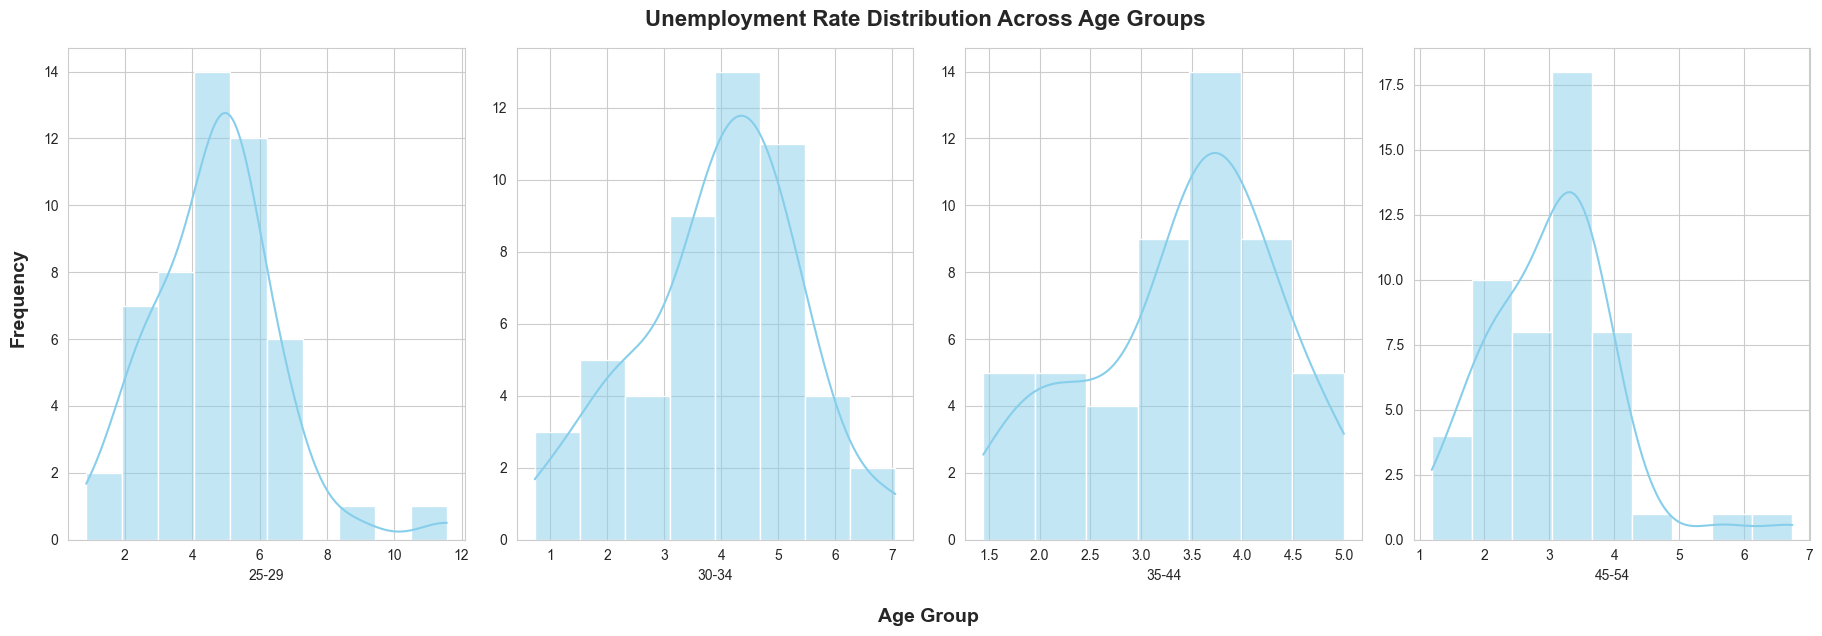

Shapiro-Wilk Test Results:
25-29 years: ShapiroResult(statistic=0.943329442470616, pvalue=0.01673815577169222)
30-34 years: ShapiroResult(statistic=0.9768082336852432, pvalue=0.4134479002836231)
35-44 years: ShapiroResult(statistic=0.9535311406127487, pvalue=0.0443251004842619)
35-44 years: ShapiroResult(statistic=0.9272697348753803, pvalue=0.0039181570465018105)


In [104]:
# Distribtion plots for unemployment rate across the age grouops.

# Set up the figure and axes
fig, axes = plt.subplots(1, 4, figsize=(18,6))

# Plot histogram for each age group on separate axes
sns.histplot(data=df_unempl_rate, x='25-29', kde=True, color='skyblue', ax=axes[0])
sns.histplot(data=df_unempl_rate, x='30-34', kde=True, color='skyblue', ax=axes[1])
sns.histplot(data=df_unempl_rate, x='35-44', kde=True, color='skyblue', ax=axes[2])
sns.histplot(data=df_unempl_rate, x='45-54', kde=True, color='skyblue', ax=axes[3])

# Set common title for the entire figure
plt.suptitle('Unemployment Rate Distribution Across Age Groups ', fontsize=16, fontweight='bold')

# Set common axis label
fig.text(0.5, -0.04, 'Age Group', ha='center', fontsize=14, fontweight='bold')
fig.text(-0.01, 0.5, 'Frequency', va='center', rotation='vertical', fontsize=14, fontweight='bold')

#This code is just for hidng the label in the y-axis
for ax in axes:
    ax.set_ylabel('')
    
plt.tight_layout()
plt.show()

# Shapio-Wilk Test

from scipy.stats import shapiro

# Perform Shapiro-Wilk test for each age group
shapiro_test_2529 = shapiro(df_unempl_rate['25-29'])
shapiro_test_3034 = shapiro(df_unempl_rate['30-34'])
shapiro_test_3544 = shapiro(df_unempl_rate['35-44'])
shapiro_test_4554 = shapiro(df_unempl_rate['45-54'])

print("Shapiro-Wilk Test Results:")
print("25-29 years:", shapiro_test_2529)
print("30-34 years:", shapiro_test_3034)
print("35-44 years:", shapiro_test_3544)
print("35-44 years:", shapiro_test_4554)


From the distribution plots and the Shapiro test results (p_value>0.05, we fail to reject that the distribution comes from a Normal distribution), 

We see that all the distribution of the unemployment rate, except the group of 30-34, do not look Normal. 

In order to compare the difference in median across the 4 groups, we can use the one way ANOVA test for the median. However, ANOVA test needs the following assumptions:

- Normality: The dependent variable should be approximately normally distributed within each group.

- Homogeneity of Variance: The variance of the dependent variable should be equal across all groups.

- Independence: Observations within each group should be independent of each other.

In order to test for the difference in median across the 4 groups, we will use the non-parametric Kruskal-Wallis test (Ho=all medians are equal).


In [105]:
from scipy.stats import kruskal

# Performing the Kruskal-Wallis test
statistic, p_value = kruskal(df_unempl_rate["25-29"], df_unempl_rate["30-34"], df_unempl_rate["35-44"], df_unempl_rate["45-54"] )

# Print the results
print("Kruskal-Wallis Test:")
print("Statistic:", statistic)
print("p-value:", p_value)

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences between the groups.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences between the groups.")


Kruskal-Wallis Test:
Statistic: 38.188634765240295
p-value: 2.5781396226892745e-08
Reject the null hypothesis: There are significant differences between the groups.



Now, we're going to compare the two states, Ohio and Michigan. I've chosen these two states because I live in Ohio and work in Michigan.

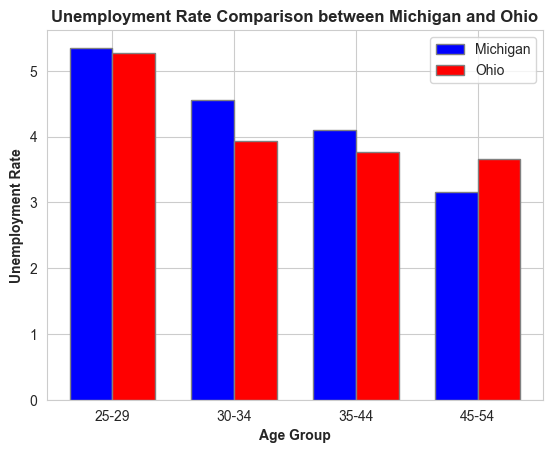

In [106]:
# We will use 3 lists to make this side by side bar plot
states = ["Michigan", "Ohio"]
age_groups = ["25-29", "30-34", "35-44", "45-54"]
michigan_rates = df_unempl_rate[df_unempl_rate["state_id"] == "26"].iloc[0, 2:].tolist()
ohio_rates = df_unempl_rate[df_unempl_rate["state_id"] == "39"].iloc[0, 2:].tolist()

# Set position of bar on X axis
r1 = np.arange(len(age_groups))
r2 = [x + bar_width for x in r1]

# Plotting the bars
plt.bar(r1, michigan_rates, color="blue", width=bar_width, edgecolor="grey", label="Michigan")
plt.bar(r2, ohio_rates, color="red", width=bar_width, edgecolor="grey", label="Ohio")

# Adding labels and title
plt.xlabel("Age Group", fontweight="bold")
plt.ylabel("Unemployment Rate", fontweight="bold")
plt.title("Unemployment Rate Comparison between Michigan and Ohio", fontweight="bold")
plt.xticks([r + bar_width / 2 for r in range(len(age_groups))], age_groups)

# Adding legend
plt.legend()

# Show plot
plt.show()


We can see that the age group of 35-44, in the year of 2019, the unemployment rate is a little bit higher in Michigan than in Ohio for this pool, non-military females who are actively seeking for jobs. The two values are  [4.102944, 3.760312] accordingly. 

I belong to this group. 

# Conclusion.

Using the dataset, we have learn that there are satistically evidence for the difference in median for the unemployment rate across the for groups for the groups of non-military people who are actively looking for jobs. 

For deeper understanding, we will get more data from different years and also look at other factors that affect the differences. Deeper statiscal data analysis can be applied to the extended dataset. Some examples of the statistical data analysis can be:

- Correlation Analysis: correlation analysis to examine the relationship between unemployment rates and other variables, such as education level, income, or geographic location.

- Regression Analysis: multiple regression can be used to predict unemployment rates based on other factors such as demographic factors. 

- Time Series Analysis: if we can get multipe years, then time series data analysis can be appplied to find the trends and pattersn in unemployment rate over time.

- Cluster Analysis: this can help to identify groups of states with similar patterns of unemployment rates.

- Factor Analysis: this will help to identify underlying factors that contribute to variation in unemployment rates across states.

- Machine Learning Models: ML models  such as decision trees, random forests, or neural networks, to predict unemployment rates.